# Feature Engineering – Sustainable Manufacturing

## Objective
- Transform cleaned sensor data into meaningful ML features
- Create sustainability-related indicators
- Prepare final dataset for model training


Import Libraries

In [2]:
import pandas as pd
import numpy as np

Load Clean Dataset

In [3]:
data_path = "../Dataset/processed/manufacturing_processed.csv"
df = pd.read_csv(data_path)

df.head()


,air_temp_k,process_temp_k,rotational_speed_rpm,torque_nm,tool_wear_min,power_proxy
0,298.1,308.6,1551,42.8,0,66382.8
1,298.2,308.7,1408,46.3,3,65190.4
2,298.1,308.5,1498,49.4,5,74001.2
3,298.2,308.6,1433,39.5,7,56603.5
4,298.2,308.7,1408,40.0,9,56320.0


Understand Available Features

In [4]:
df.columns

Index(['air_temp_k', 'process_temp_k', 'rotational_speed_rpm', 'torque_nm',
       'tool_wear_min', 'power_proxy'],
      dtype='object')

Create Temperature Difference Feature

In [5]:
df["temp_diff_k"] = df["process_temp_k"] - df["air_temp_k"]


In [6]:
df["temp_diff_k"]

0       10.5
1       10.5
2       10.4
3       10.4
4       10.5
        ... 
9995     9.6
9996     9.5
9997     9.6
9998     9.7
9999     9.7
Name: temp_diff_k, Length: 10000, dtype: float64

Normalize Tool Wear (Usage Severity)

In [7]:
df["tool_wear_rate"] = df["tool_wear_min"] / df["tool_wear_min"].max()
df["tool_wear_rate"]

0       0.000000
1       0.011858
2       0.019763
3       0.027668
4       0.035573
          ...   
9995    0.055336
9996    0.067194
9997    0.086957
9998    0.098814
9999    0.118577
Name: tool_wear_rate, Length: 10000, dtype: float64

Energy Intensity Proxy

In [8]:
df["energy_intensity"] = (
    df["rotational_speed_rpm"] * df["torque_nm"] * df["temp_diff_k"]
)
df["energy_intensity"]

0       697019.40
1       684499.20
2       769612.48
3       588676.40
4       591360.00
          ...    
9995    454252.80
9996    493027.20
9997    527452.80
9998    662393.60
9999    584910.00
Name: energy_intensity, Length: 10000, dtype: float64

Feature Scaling

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_features = [
    "rotational_speed_rpm",
    "torque_nm",
    "tool_wear_rate",
    "temp_diff_k",
    "energy_intensity"
]

df[scaled_features] = scaler.fit_transform(df[scaled_features])


In [10]:
df[scaled_features].head()

,rotational_speed_rpm,torque_nm,tool_wear_rate,temp_diff_k,energy_intensity
0,0.222934,0.535714,0.000000,0.644444,0.572356
1,0.139697,0.583791,0.011858,0.644444,0.560224
2,0.192084,0.626374,0.019763,0.622222,0.642702
3,0.154249,0.490385,0.027668,0.622222,0.467367
4,0.139697,0.497253,0.035573,0.644444,0.469968


Create Sustainability Score (Target Variable)

In [11]:
df["sustainability_score"] = (
    (1 - df["energy_intensity"]) * 0.4 +
    (1 - df["tool_wear_rate"]) * 0.3 +
    (1 - df["temp_diff_k"]) * 0.3
)
df["sustainability_score"].head()

0    0.577724
1    0.579020
2    0.550324
3    0.618086
4    0.608008
Name: sustainability_score, dtype: float64

Final Feature Selection

In [12]:
final_features = [
    "rotational_speed_rpm",
    "torque_nm",
    "tool_wear_rate",
    "temp_diff_k",
    "energy_intensity",
    "sustainability_score"
]

df_final = df[final_features]
df_final.head()


,rotational_speed_rpm,torque_nm,tool_wear_rate,temp_diff_k,energy_intensity,sustainability_score
0,0.222934,0.535714,0.000000,0.644444,0.572356,0.577724
1,0.139697,0.583791,0.011858,0.644444,0.560224,0.579020
2,0.192084,0.626374,0.019763,0.622222,0.642702,0.550324
3,0.154249,0.490385,0.027668,0.622222,0.467367,0.618086
4,0.139697,0.497253,0.035573,0.644444,0.469968,0.608008


Feature Correlation

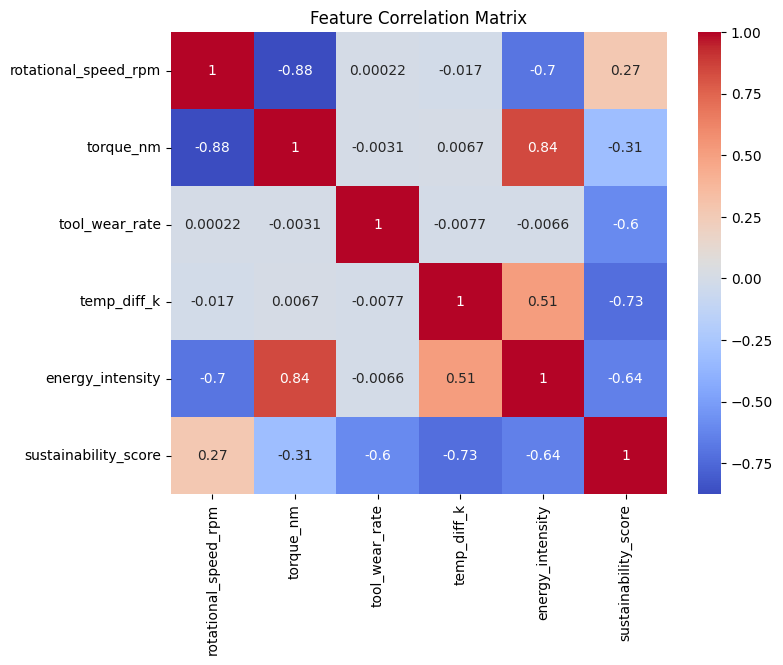

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(df_final.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

Save Feature-Engineered Dataset

In [14]:
final_path = "../Dataset/processed/manufacturing_features.csv"
df_final.to_csv(final_path, index=False)

print("✅ Feature-engineered dataset saved successfully")


✅ Feature-engineered dataset saved successfully
